# Import Necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import timeit
import pandas as pd



import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras.utils import plot_model


from datetime import datetime
from packaging import version
import os

# to disable progress bar
tfds.disable_progress_bar()
print("TensorFlow version: ", tf.__version__)
print("TensorFlow datasets version: ", tfds.__version__)

TensorFlow version:  2.6.0
TensorFlow datasets version:  4.4.0


# Selecting Datasets
1. https://www.tensorflow.org/datasets/overview
2. https://www.tensorflow.org/datasets/catalog/overview

In [2]:
# display list of build in datasets in TensorFlow
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'd4rl_adroit_door',
 'd4rl_adroit_hammer',
 'd4rl_adroit_pen',
 'd4rl_adroit_relocate',
 'd4rl_mujoco_ant',
 'd4

# Experiment 1 

## Information about dataset

In [3]:
# display information about other data set
builder = tfds.builder('horses_or_humans')
builder.info

tfds.core.DatasetInfo(
    name='horses_or_humans',
    full_name='horses_or_humans/3.0.0',
    description="""
    A large set of images of horses and humans.
    """,
    homepage='http://laurencemoroney.com/horses-or-humans-dataset',
    data_path='C:\\Users\\asets\\tensorflow_datasets\\horses_or_humans\\3.0.0',
    download_size=153.59 MiB,
    dataset_size=153.53 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=256, num_shards=1>,
        'train': <SplitInfo num_examples=1027, num_shards=2>,
    },
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/horses-or-humans-dataset"
    }""",
)

## Data Spliting 

In [4]:
# creating training and testing datasets
ds_train_hh = tfds.load(name='horses_or_humans', split='train')
ds_test_hh = tfds.load(name='horses_or_humans', split='test')

## Display examples of dataset

The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


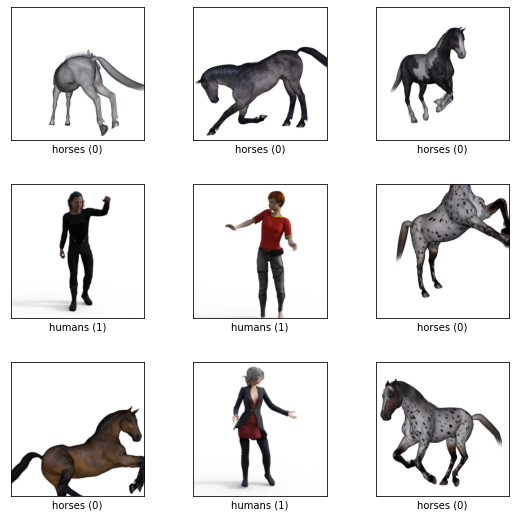

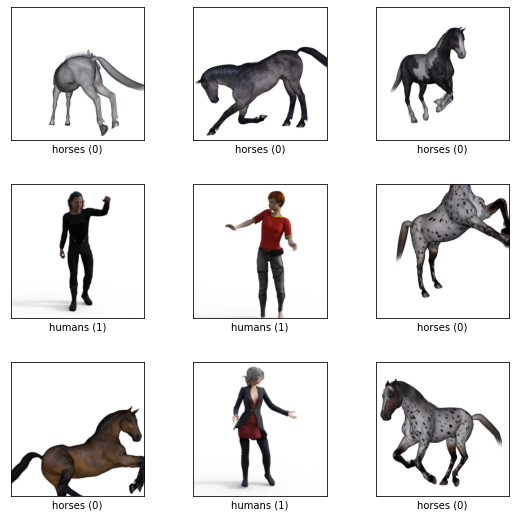

In [5]:
# show examples
tfds.show_examples(builder.info, ds_test_hh)

## Data Preparation
1. separate images and labels 
2. convert into numpy array
3. convert (300,300,3) into (300,300,1)
4. change data type to 'float32' 
5. float values in range 0-1 (divide on 255)

In [6]:
# separate images and labels, numpy type, remove last dimetions in images = channel responsible for color red, blue green
train_images_hh = np.array([example["image"].numpy()[:,:,0] for example in ds_train_hh])
train_labels_hh = np.array([example["label"].numpy() for example in ds_train_hh])

test_images_hh = np.array([example["image"].numpy()[:,:,0] for example in ds_test_hh])
test_labels_hh = np.array([example["label"].numpy() for example in ds_test_hh])

In [7]:
# reshape for keras specification
train_images_hh = train_images_hh.reshape(1027, 300, 300, 1)
test_images_hh = test_images_hh.reshape(256, 300, 300, 1)

In [8]:
# convert images into float32 type so we are able to work with range 0-1 instead of 0-255 help network learn better this way
train_images_hh= train_images_hh.astype('float32')
test_images_hh= test_images_hh.astype('float32')

train_images_hh /= 255
test_images_hh /= 255

## Model 1 Fully connected neural network 

### Model 1 creating compiling and training

In [9]:
# creating a model
model_1 = keras.Sequential([
      keras.layers.Flatten(name="input_layer"),                      
      keras.layers.Dense(70, activation='relu', name="hidden_layer_1"),
      keras.layers.Dense(64, activation='relu', name="hidden_layer_2"),
      keras.layers.Dense(3, activation='softmax', name="output_layer")],
      name="Fully_Connected_Neural_Network")

# compiling a model
model_1.compile(optimizer=tf.optimizers.Adam(lr=0.001),
                loss=keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

# Create a TensorBoard callback to capture performance profiles and call it while training the model.
logs = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs, histogram_freq = 1, profile_batch = '500,520')


# training
model_1.fit(train_images_hh, train_labels_hh, epochs=5, batch_size=32, callbacks = [tboard_callback])



C:\Users\asets\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/5
33/33 [==============================] - 2s 36ms/step - loss: 6.3689 - accuracy: 0.5307
Epoch 2/5
33/33 [==============================] - 1s 37ms/step - loss: 0.7955 - accuracy: 0.7731
Epoch 3/5
33/33 [==============================] - 1s 36ms/step - loss: 0.9482 - accuracy: 0.7468
Epoch 4/5
33/33 [==============================] - 2s 49ms/step - loss: 1.3465 - accuracy: 0.7098
Epoch 5/5
33/33 [==============================] - 2s 54ms/step - loss: 1.4473 - accuracy: 0.6933


### Model 1 summary

In [10]:
# model 1 summary
model_1.summary()

Model: "Fully_Connected_Neural_Network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Flatten)        (None, 90000)             0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 70)                6300070   
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 64)                4544      
_________________________________________________________________
output_layer (Dense)         (None, 3)                 195       
Total params: 6,304,809
Trainable params: 6,304,809
Non-trainable params: 0
_________________________________________________________________


### Model 1 architecture

In [11]:
#  model architecture
plot_model(model=model_1, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


### Model 1 TensorBoard

In [12]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

In [13]:
# Launch TensorBoard and navigate to the Profile tab to view performance profile
%tensorboard --logdir=logs

### Model 1 evaluation

In [14]:
# model evaluation on test dataset
import timeit
start = timeit.default_timer()
metrics_m1_hh = model_1.evaluate(test_images_hh, test_labels_hh)
stop = timeit.default_timer()
model1_speed_hh = (stop - start)
model1_accuracy_hh = metrics_m1_hh[1] * 100
metrics_m1_hh

8/8 [==============================] - 0s 15ms/step - loss: 9.0202 - accuracy: 0.5000


[9.020180702209473, 0.5]

### Model 1 evaluation metrics

In [15]:
print("Experiment 1 ")
print("Model 1")
print(f'accuracy: { model1_accuracy_hh: .3f} %')
print(f'speed { model1_speed_hh: .3f} s')


Experiment 1 
Model 1
accuracy:  50.000 %
speed  0.352 s


## Model 2 Convolutional Neural Network (CNN)

### Model 2 creating compiling and training

In [16]:
# create a model
model_2 = keras.Sequential([
      keras.layers.Conv2D(24, 3, activation='relu', input_shape=(300,300,1), name="input_layer"),
      keras.layers.Conv2D(24, 3, activation= 'relu', name="hidden_layer_1"),
      keras.layers.Flatten(name="hidden_layer_2"),
      keras.layers.Dense(3, activation='softmax', name="output_layer")],
      name="Convolutional_Neural_Network")

# compile
model_2.compile(optimizer=tf.optimizers.Adam(lr=0.0001),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Create a TensorBoard callback to capture performance profiles and call it while training the model.
logs = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs, histogram_freq = 1, profile_batch = '500,520')

# training
model_2.fit(train_images_hh, train_labels_hh, epochs=5, batch_size=32, callbacks = [tboard_callback])

Epoch 1/5
33/33 [==============================] - 88s 3s/step - loss: 1.2468 - accuracy: 0.6154
Epoch 2/5
33/33 [==============================] - 81s 2s/step - loss: 0.5194 - accuracy: 0.7926
Epoch 3/5
33/33 [==============================] - 87s 3s/step - loss: 0.1954 - accuracy: 0.9202
Epoch 4/5
33/33 [==============================] - 84s 3s/step - loss: 0.1071 - accuracy: 0.9698
Epoch 5/5
33/33 [==============================] - 82s 2s/step - loss: 0.0683 - accuracy: 0.9815


### Model 2 summary

In [17]:
# model 2 summary
model_2.summary()

Model: "Convolutional_Neural_Network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Conv2D)         (None, 298, 298, 24)      240       
_________________________________________________________________
hidden_layer_1 (Conv2D)      (None, 296, 296, 24)      5208      
_________________________________________________________________
hidden_layer_2 (Flatten)     (None, 2102784)           0         
_________________________________________________________________
output_layer (Dense)         (None, 3)                 6308355   
Total params: 6,313,803
Trainable params: 6,313,803
Non-trainable params: 0
_________________________________________________________________


### Model 2 architecture

In [18]:
#  model architecture
plot_model(model=model_2, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


### Model 2 TensorBoard

In [19]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [20]:
# Launch TensorBoard and navigate to the Profile tab to view performance profile
%tensorboard --logdir=logs

Reusing TensorBoard on port 6006 (pid 9476), started 0:07:06 ago. (Use '!kill 9476' to kill it.)

### Model 2 evaluation

In [21]:
# model evaluation on test dataset
start = timeit.default_timer()
metrics_m2_hh = model_2.evaluate(test_images_hh, test_labels_hh)
stop = timeit.default_timer()
model2_speed_hh = (stop - start) 
model2_accuracy_hh = metrics_m2_hh[1] * 100
metrics_m2_hh

8/8 [==============================] - 6s 699ms/step - loss: 0.6345 - accuracy: 0.8633


[0.6344625949859619, 0.86328125]

### Model 2 evaluation metrics

In [22]:
print("Experiment 1") 
print("Model 2")
print(f"accuracy: { model2_accuracy_hh: .3f} %,")
print(f'speed: { model2_speed_hh: .3f} s ')


Experiment 1
Model 2
accuracy:  86.328 %,
speed:  5.635 s 


## Compare accuracy and speed (experiment 1)

In [24]:
# compare our models results using pandas DataFrame 
import pandas as pd
model_results_hh = [["Fully connected model", model1_speed_hh, model1_accuracy_hh ],
                 ["Convolutional model", model2_speed_hh, model2_accuracy_hh ]]

results_hh = pd.DataFrame(model_results_hh, columns=["model", "speed (s/step)", "accuracy (%)"])
results_hh

,model,speed (s),accuracy (%)
0,Fully connected model,0.351532,50.000000
1,Convolutional model,5.634601,86.328125


# Experiment 2

## Information about dataset

In [25]:
# display information about data set
builder = tfds.builder('rock_paper_scissors')
builder.info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_path='C:\\Users\\asets\\tensorflow_datasets\\rock_paper_scissors\\3.0.0',
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
)

## Data Splitting 

In [26]:
# creating training and testing datasets
ds_train = tfds.load(name='rock_paper_scissors', split='train')
ds_test = tfds.load(name='rock_paper_scissors', split='test')


## Show data axamples

The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


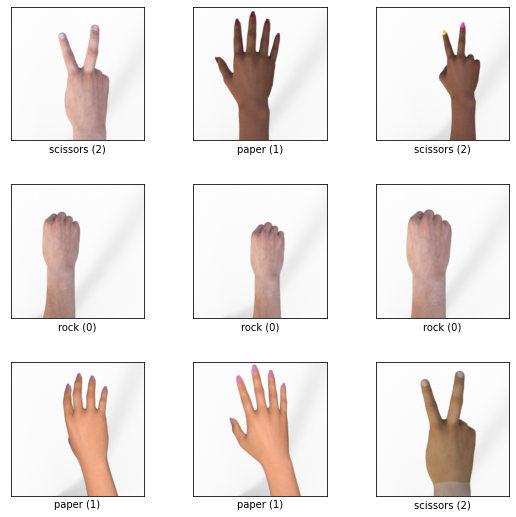

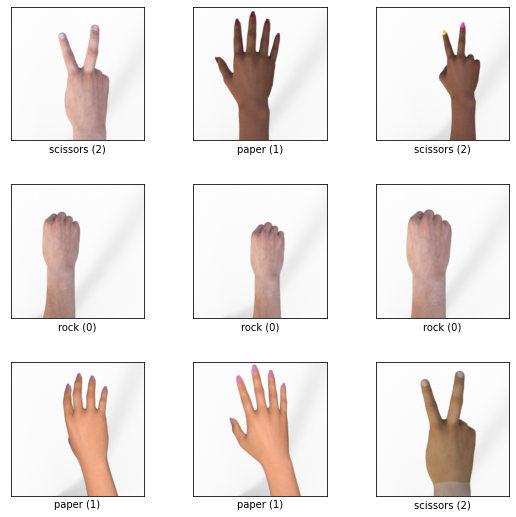

In [27]:
# show examples
tfds.show_examples(builder.info, ds_test)

## Data Preparation
1. separate images and labels 
2. convert into numpy array
3. reshape from (300,300,3) into (300,300,1)
4. change data type to 'float32' instesd 'uint8'
5. float values in range 0-1 (divide on 255)

In [28]:
# separate images and labels, numpy type, remove last dimetions in images = channel responsible for color red, blue green
train_images = np.array([example["image"].numpy()[:,:,0] for example in ds_train])
train_labels = np.array([example["label"].numpy() for example in ds_train])

test_images = np.array([example["image"].numpy()[:,:,0] for example in ds_test])
test_labels = np.array([example["label"].numpy() for example in ds_test])

In [29]:
# reshape for keras specification
train_images = train_images.reshape(2520, 300, 300, 1)
test_images = test_images.reshape(372, 300, 300, 1)

Comment: Images has 'uint8' data type, integer values from 0-255, but when we are doing image classification we would like to work with float values, specifically between the range of 0 to 1

In [30]:
# convert images into float32 type so we are able to work with range 0-1 instead of 0-255 help network learn better this way
train_images= train_images.astype('float32')
test_images= test_images.astype('float32')

train_images /= 255
test_images /= 255

## Model 1 Fully Connected Neural Network

### Model 1 training

In [31]:
# since Model 1 already created and compiled we can only train it during experiment 2
# training model
model_1.fit(train_images, train_labels, epochs=5, batch_size=32, callbacks = [tboard_callback])


Epoch 1/5
79/79 [==============================] - 3s 37ms/step - loss: 9.1511 - accuracy: 0.5012
Epoch 2/5
79/79 [==============================] - 3s 40ms/step - loss: 0.9144 - accuracy: 0.6952
Epoch 3/5
79/79 [==============================] - 3s 38ms/step - loss: 0.8757 - accuracy: 0.7357
Epoch 4/5
79/79 [==============================] - 3s 39ms/step - loss: 0.3836 - accuracy: 0.8591
Epoch 5/5
79/79 [==============================] - 3s 39ms/step - loss: 0.3296 - accuracy: 0.8837


### Model 1 evaluation

In [32]:
# model evaluation on test dataset
import timeit
start = timeit.default_timer()
metrics_m1 = model_1.evaluate(test_images, test_labels)
stop = timeit.default_timer()
model1_speed = stop - start
model1_accuracy = metrics_m1[1] * 100
metrics_m1

12/12 [==============================] - 0s 15ms/step - loss: 3.1349 - accuracy: 0.4489


[3.1348729133605957, 0.448924720287323]

### Model 1 evaluation metrics

In [33]:
print("Experiment 2 ")
print("Model 1")
print(f'accuracy: { model1_accuracy: .3f} %')
print(f'speed { model1_speed: .3f} s')


Experiment 2 
Model 1
accuracy:  44.892 %
speed  0.500 s


## Model 2 Convolutional Neural Network CNN

### Model 2 training

In [34]:
# Since model 2 already created and compile we can only train model
# training model
model_2.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 198s 3s/step - loss: 2.3519 - accuracy: 0.7778
Epoch 2/5
79/79 [==============================] - 190s 2s/step - loss: 0.1042 - accuracy: 0.9841
Epoch 3/5
79/79 [==============================] - 191s 2s/step - loss: 0.0511 - accuracy: 0.9948
Epoch 4/5
79/79 [==============================] - 222s 3s/step - loss: 0.0256 - accuracy: 0.9984
Epoch 5/5
79/79 [==============================] - 198s 2s/step - loss: 0.0207 - accuracy: 0.9984


### Model 2 evaluation 

In [35]:
# model 2 evaluation 
start = timeit.default_timer()
metrics_m2 = model_2.evaluate(test_images, test_labels)
stop = timeit.default_timer()
model2_speed = stop - start
model2_accuracy = metrics_m2[1] * 100
metrics_m2

12/12 [==============================] - 7s 554ms/step - loss: 0.6384 - accuracy: 0.7527


[0.638403594493866, 0.7526881694793701]

### Model 2 evaluation metrics

In [36]:
print("Experiment 2") 
print("Model 2")
print(f"accuracy: { model2_accuracy: .3f} %,")
print(f'speed: { model2_speed: .3f} s ')


Experiment 2
Model 2
accuracy:  75.269 %,
speed:  6.904 s 


## Compare accurasy and speed (Experiment 2) 

In [37]:
# compare our models results using pandas DataFrame 
import pandas as pd

model_results = [["Fully connected model", model1_speed, model1_accuracy ],
                 ["Convolutional NN model", model2_speed, model2_accuracy ]]

results = pd.DataFrame(model_results, columns=["model", "speed (s/step)", "accuracy (%)"])
results

,model,speed (s/step),accuracy (%)
0,Fully connected model,0.500314,44.892472
1,Convolutional NN model,6.904467,75.268817
